In [12]:
import numpy as np

class KeyCommand:
    
    def __init__(self, key):
        self._key = int(key)
        self._com = np.empty(2)
    
    def key(self):
        
        x = 0.1
        y = 0.5
        com = self._com
        
        if self._key == 119: # w 前進
            com[0] += x
            com[1] = 1.0
        elif self._key == 97: # a 左折
            com[1] = y
        elif self._key == 100: # d 右折
            com[1] = -y
        elif self._key == 120: # x 後退
            com[0] -= x
            com[1] = 1.0
        else: # s 停止
            com = np.zeros(2)
            
        return com
    
def Motion():
    
    key = input('key: ')
    if key == '3' or key == '113': # Ctrl+c or q
        key = False
        return key
    else:
        key_command = KeyCommand(key)
        com = key_command.key()
        print('{0:.2f}, {1:.2f}'.format(com[0], com[1]))

def run():
    print('前進 : 119，右折 : 100，停止 : 115，左折 : 97，後退 : 120')
    a = True
    while True:
        a = Motion()
        if a == False:
            break

In [13]:
run()

前進 : 119，右折 : 100，停止 : 115，左折 : 97，後退 : 120
key: 119
35.10, 1.00
key: 115
0.00, 0.00
key: 97
0.00, 0.50
key: 97
0.00, 0.50
key: 120
-0.10, 1.00
key: 120
-0.20, 1.00
key: 120
-0.30, 1.00
key: 3


# 動的にグラフ描写

<IPython.core.display.Javascript object>


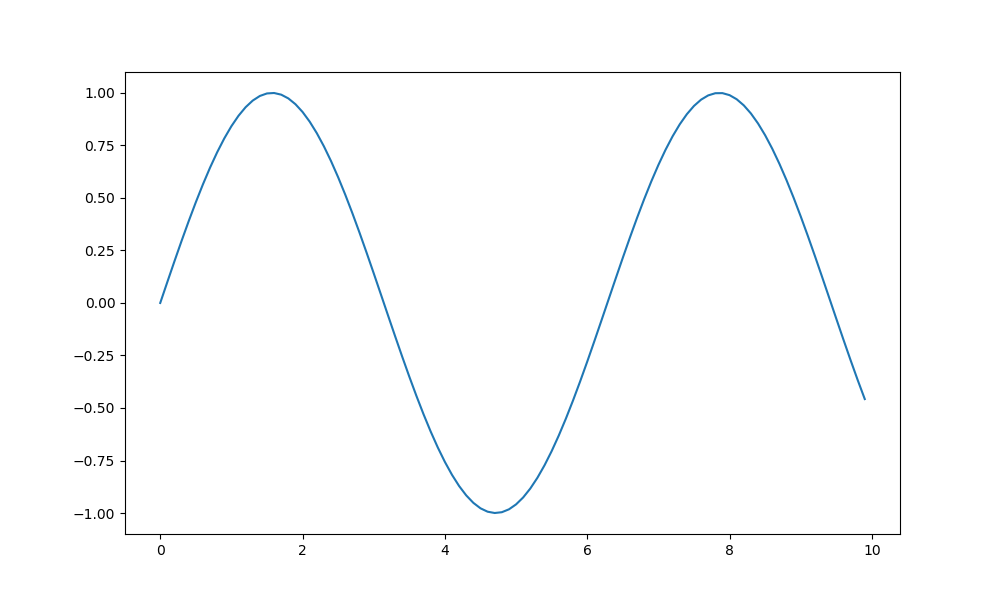

In [1]:
%matplotlib nbagg

import itertools
import math

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


def _update(frame, x, y):
    """グラフを更新するための関数"""
    # 現在のグラフを消去する
    plt.cla()
    # データを更新 (追加) する
    x.append(frame)
    y.append(math.sin(frame))
    # 折れ線グラフを再描画する
    plt.plot(x, y)


# 描画領域
fig = plt.figure(figsize=(10, 6))
# 描画するデータ
x = []
y = []

params = {
    'fig': fig,
    'func': _update,  # グラフを更新する関数
    'fargs': (x, y),  # 関数の引数 (フレーム番号を除く)
    'interval': 10,  # 更新間隔 (ミリ秒)
    'frames': np.arange(0, 10, 0.1),  # フレーム番号を生成するイテレータ
    'repeat': False,  # 繰り返さない
}
anime = animation.FuncAnimation(**params)

# Threading

In [1]:
# Threadを継承したクラスを作成する場合
import threading
import time

class MyThread(threading.Thread):
    def __init__(self, i):
        super(MyThread, self).__init__()
        self.i = i
        self.stop_event = threading.Event()
        self.setDaemon(True)
        
    def stop(self):
        self.stop_event.set()

    def run(self):
        print('START {}'.format(self.i))
        #i = 0
        while not self.stop_event.is_set():
            print('I am no. {}'.format(self.i))
            time.sleep(self.i)
            #i += 1
        print('END {}'.format(self.i))
        
    def turnRight(self, vec):
        print("Turn right!: {}".format(vec))
        self.i = vec

if __name__ == '__main__':
    i = int(input('i: '))
    th1 = MyThread(i)
    th2 = MyThread(2)
    th1.start()
    th2.start()
    time.sleep(2)
    i = int(input('i: '))
    th1.turnRight(i)
    time.sleep(10)
    th1.stop()
    th2.stop()

i: 6
START 6
I am no. 6
START 2
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
I am no. 2
I am no. 2
I am no. 6
I am no. 2
i: 5
Turn right!: 5
I am no. 2
I am no. 2
I am no. 5
I am no. 2
I am no. 2
I am no. 2
END 5
END 2


In [ ]:
import numpy as np
import threading
import time
            
class MyThread(threading.Thread):
    def __init__(self):
        super(MyThread, self).__init__()
        self.com = np.zeros(2)
        self.stop_event = threading.Event()
        self.setDaemon(True)
        
    def stop(self):
        self.stop_event.set()

    def run(self):
        print('前進 : 119，右折 : 100，停止 : 115，左折 : 97，後退 : 120')
        
        while not self.stop_event.is_set():
            com = self.com
            print('{0:.2f}, {1:.2f}'.format(com[0], com[1]))
            
        print('END')
        
    def Move(self, key):
        key = int(key)
        x = 0.1
        y = 0.5
        com = self.com
        
        if key == 119: # w 前進
            com[0] += x
            com[1] = 1.0
        elif key == 97: # a 左折
            com[1] = y
        elif key == 100: # d 右折
            com[1] = -y
        elif key == 120: # x 後退
            com[0] -= x
            com[1] = 1.0
        else: # s 停止
            com = np.zeros(2)
            
        self._com = com

if __name__ == '__main__':
    th = MyThread()
    th.start()
    key = input('key: ')
    th.Move(key)
    while not key == '3' or key == '113': # Ctrl+c or q
        key = input('key: ')
        th.Move(key)

    th.stop()

前進 : 119，右折 : 100，停止 : 115，左折 : 97，後退 : 120
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00
0.00, 0.00

# ローパスフィルター

<IPython.core.display.Javascript object>


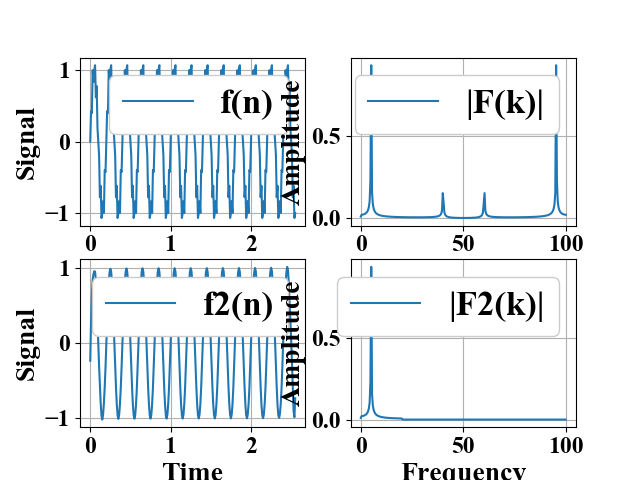

In [6]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt


def main():
    # データのパラメータ
    N = 256            # サンプル数
    dt = 0.01          # サンプリング間隔
    fq1, fq2 = 5, 40    # 周波数
    fc = 20            # カットオフ周波数
    t = np.arange(0, N*dt, dt) # 時間軸
    freq = np.linspace(0, 1.0/dt, N) # 周波数軸

    # 時間信号（周波数5の正弦波 + 周波数40の正弦波）の生成
    f = np.sin(2*np.pi*fq1*t) + 0.2 * np.sin(2*np.pi*fq2*t)

    # 高速フーリエ変換（周波数信号に変換）
    F = np.fft.fft(f)
    
    # 正規化 + 交流成分2倍
    F = F/(N/2)
    F[0] = F[0]/2

    # 配列Fをコピー
    F2 = F.copy()

    # ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする）
    F2[(freq > fc)] = 0

    # 高速逆フーリエ変換（時間信号に戻す）
    f2 = np.fft.ifft(F2)

    # 振幅を元のスケールに戻す
    f2 = np.real(f2*N)

    # グラフ表示
    %matplotlib notebook
    plt.figure()
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 17

    # 時間信号（元）
    plt.subplot(221)
    plt.plot(t, f, label='f(n)')
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Signal", fontsize=20)
    plt.grid()
    leg = plt.legend(loc=1, fontsize=25)
    leg.get_frame().set_alpha(1)

    # 周波数信号(元)
    plt.subplot(222)
    plt.plot(freq, np.abs(F), label='|F(k)|')
    plt.xlabel('Frequency', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.grid()
    leg = plt.legend(loc=1, fontsize=25)
    leg.get_frame().set_alpha(1)

    # 時間信号(処理後)
    plt.subplot(223)
    plt.plot(t, f2, label='f2(n)')
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Signal", fontsize=20)
    plt.grid()
    leg = plt.legend(loc=1, fontsize=25)
    leg.get_frame().set_alpha(1)

    # 周波数信号(処理後)
    plt.subplot(224)
    plt.plot(freq, np.abs(F2), label='|F2(k)|')
    plt.xlabel('Frequency', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.grid()
    leg = plt.legend(loc=1, fontsize=25)
    leg.get_frame().set_alpha(1)
    plt.show()


if __name__ == "__main__":
    main()

# 時間経過で速度0

In [15]:
import math
from math import pi
import numpy as np
import threading
from time import sleep, time

start = time()
g = 9.8 # 重力
u = 0.4 #摩擦係数
speed = pi # 速度
start_time = start

while True:
    t = time() - start
    if t >= 0.01:
        
        speed = speed ** 2 - 2*u*g*t # 速度の2乗
        
        if speed > 0:
            speed = speed ** 0.5
        else:
            speed = 0.0
            
        start = time()
    
    if speed == 0.0:
        break

print("time: {0}".format(time() - start_time))

speed: 3.1290894422266207
speed: 3.116536369596946
speed: 3.1039325296447595
speed: 3.091277301400397
speed: 3.0785700511308374
speed: 3.0658101319693842
speed: 3.0529968835314163
speed: 3.040129631515562
speed: 3.0272076872896174
speed: 3.0142303474604857
speed: 3.0011968934273816
speed: 2.9881065909174946
speed: 2.974958689503264
speed: 2.961752422100366
speed: 2.948487004445465
speed: 2.9351616345527205
speed: 2.9217754921479857
speed: 2.908327738079567
speed: 2.894817513704347
speed: 2.8812439402480003
speed: 2.867606118137955
speed: 2.85390312630766
speed: 2.840134021470649
speed: 2.8262975066825127
speed: 2.8123932516357297
speed: 2.7984199126315192
speed: 2.784376449580589
speed: 2.770261458661213
speed: 2.7560745191141254
speed: 2.741814173221184
speed: 2.7274792695899577
speed: 2.71306862640984
speed: 2.698580683984476
speed: 2.6840148869819123
speed: 2.6693696108083147
speed: 2.6546435400394794
speed: 2.639835322560812
speed: 2.624943568118399
speed: 2.609966846795675
speed: 

In [4]:
a = 2
a ** 0.5

1.4142135623730951

In [ ]:
x = input()
while True:
    x = input()
    if x != x:
        break

1
3
3
4
5


In [ ]:
import threading
from time import time
import numpy as np

class MyThread(threading.Thread):
    def __init__(self):
        super(MyThread, self).__init__()
        self.stop_event = threading.Event()
        self.setDaemon(True)
        self.com = np.empty(2)
        self.key = 0
        
    def stop(self):
        self.stop_event.set()

    def run(self):
        
        start = time()
        while not self.stop_event.is_set():
            t = time() - start
            if t >= 1.0:
                start = time()
            elif t < 1.0:
                if self.com[0] != self.com[1]:
                    print("Changed")
                elif self.com[0] == self.com[1]:
                    print("Keeping")
        
    def Move(self, key):
        key = key
        if self.com[0] != self.com[0]:
            self.com[0] = key
        self.key = key
        if self.com[0] != key

if __name__ == '__main__':
    th = MyThread()
    th.start()
    start = time()
    t = time() - start
    
    while t < 10:
        key = int(input("Key:"))
        th.Move(key)
        t = time() - start
        
    th.stop()
    print("END")

Keeping
Key:1
Keeping
Keeping
Keeping
Key:2
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keep

Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping
Keeping


In [ ]:
import threading
from time import time
import numpy as np

start = time()
t = time() - start
com = np.empty(2)
i = 0

while i < 5:
    while t < 1:
        key = int(input("Key:"))
        com[0] = key
        print(com)
        t = time() - start
        i += 1
        com[1] = key

print("END")

Key:1
[1. 0.]
